In [1]:
import pandas as pd

df = pd.read_csv('Turbine_Data.csv', parse_dates = True, header = 0)
df['Time'] = pd.to_datetime(df["Unnamed: 0"], yearfirst = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   Unnamed: 0                    118224 non-null  object             
 1   ActivePower                   94750 non-null   float64            
 2   AmbientTemperatue             93817 non-null   float64            
 3   BearingShaftTemperature       62518 non-null   float64            
 4   Blade1PitchAngle              41996 non-null   float64            
 5   Blade2PitchAngle              41891 non-null   float64            
 6   Blade3PitchAngle              41891 non-null   float64            
 7   ControlBoxTemperature         62160 non-null   float64            
 8   GearboxBearingTemperature     62540 non-null   float64            
 9   GearboxOilTemperature         62438 non-null   float64            
 10  GeneratorRPM        

In [2]:
from sklearn.preprocessing import LabelEncoder

df.dropna(axis=0,how = 'any',inplace = True)
df.drop(columns = ['WTG','ControlBoxTemperature','Unnamed: 0'], inplace = True) 


df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32728 entries, 70789 to 118223
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   ActivePower                   32728 non-null  float64            
 1   AmbientTemperatue             32728 non-null  float64            
 2   BearingShaftTemperature       32728 non-null  float64            
 3   Blade1PitchAngle              32728 non-null  float64            
 4   Blade2PitchAngle              32728 non-null  float64            
 5   Blade3PitchAngle              32728 non-null  float64            
 6   GearboxBearingTemperature     32728 non-null  float64            
 7   GearboxOilTemperature         32728 non-null  float64            
 8   GeneratorRPM                  32728 non-null  float64            
 9   GeneratorWinding1Temperature  32728 non-null  float64            
 10  GeneratorWinding2Temperature 

In [3]:
df_processed = df
mask = (df_processed.Time < pd.to_datetime("2020-03-01 00:00:00").tz_localize('US/Eastern'))
training_data = df_processed.loc[mask]

val_mask = (df_processed.Time >= pd.to_datetime("2020-03-01").tz_localize('US/Eastern')) & (df_processed.Time <= pd.to_datetime("2020-03-15").tz_localize('US/Eastern'))
val_data = df_processed.loc[val_mask]

test_mask = (df_processed.Time > pd.to_datetime("2020-03-15").tz_localize('US/Eastern'))
test_data = df_processed.loc[test_mask]


In [4]:
target = ['ActivePower']
columns = ['AmbientTemperatue' ,'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle' ,'Blade3PitchAngle','GearboxBearingTemperature', 'GearboxOilTemperature','GeneratorRPM','GeneratorWinding1Temperature','GeneratorWinding2Temperature','HubTemperature','MainBoxTemperature','NacellePosition','ReactivePower','RotorRPM','TurbineStatus', 'WindDirection','WindSpeed']

Epoch 1/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 753870.5000 - val_loss: 386571.6875
Epoch 2/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 548463.7500 - val_loss: 36440.6484
Epoch 3/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39043.8516 - val_loss: 18560.3203
Epoch 4/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12547.8525 - val_loss: 17757.4434
Epoch 5/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8777.8271 - val_loss: 16334.4258
Epoch 6/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6470.3164 - val_loss: 14892.4238
Epoch 7/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5106.9038 - val_loss: 13728.5410
Epoch 8/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4476.6089 - val_loss: 13742.9141
Epoch 9/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3961.1318 - val_loss: 13477.6895
Epoch 10/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3636.4854 - val_loss: 12898.0850
Epoch 11/1000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3

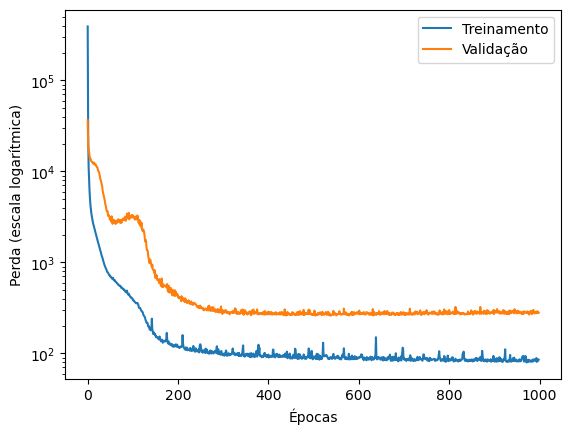

In [54]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, RMSprop
from keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X_train = training_data[columns]
y_train = training_data[target]

X_val = val_data[columns]
y_val = val_data[target]

X_test = test_data[columns]
y_test = test_data[target]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=1000, batch_size=512, validation_data=(X_val, y_val), verbose=1)

loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Perda no conjunto de teste: {loss}')

epsilon = 1e-10
plt.plot(history.history['loss'][1:], label='Treinamento')
plt.plot(history.history['val_loss'][1:], label='Validação')
plt.yscale('log') 
plt.xlabel('Épocas')
plt.ylabel('Perda (escala logarítmica)')
plt.legend()
plt.show()